In [ ]:
"""
CSCI3230 / ESTR3108 2021-22 First Term Assignment 2
I declare that the assignment here submitted is original except for source
material explicitly acknowledged, and that the same or closely related material
has not been previously submitted for another course. I also acknowledge that I
am aware of University policy and regulations on honesty in academic work, and
of the disciplinary guidelines and procedures applicable to breaches of such
policy and regulations, as contained in the following websites.
University Guideline on Academic Honesty:
http://www.cuhk.edu.hk/policy/academichonesty/
Faculty of Engineering Guidelines to Academic Honesty:
http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
Student Name: Lam Hiu Ching
Student ID : 1155129247
"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import svm
from google.colab import files
import pandas as pd
df1 = files.upload()
df2 = files.upload()

Saving training.csv to training (4).csv


Saving test.csv to test (6).csv


In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                    model.support_vectors_[:, 1],
                    s=100, linewidth=1, facecolors='none',edgecolors='k')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [1]:
import io
training = pd.read_csv(io.BytesIO(df1['training.csv']))
test = pd.read_csv(io.BytesIO(df2['test.csv']))
X = np.zeros([50,2], dtype=float)
y = np.zeros([50], dtype=float)
x_test = np.zeros([50,2], dtype=float)
y_test = np.zeros([50], dtype=float)
for i in range(len(training['x_1'])):
  X[i][0] = training['x_1'][i]
  X[i][1] = training['x_2'][i]
  y[i] = training['y'][i]
  x_test[i][0] = test['x_1'][i]
  x_test[i][1] = test['x_2'][i]
  y_test[i] = test['y'][i]



NameError: ignored

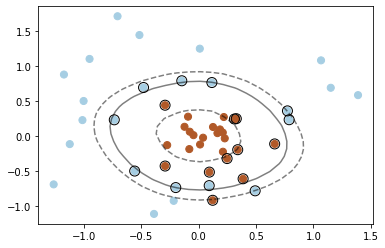

In [ ]:
clf = svm.SVC(kernel='poly',degree=4) #Polynomial Kernel with degree 4
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
plot_svc_decision_function(clf, plot_support=True)

In [ ]:
prediction = clf.predict(x_test)
acc = 0
for i in range(len(x_test)):
  if prediction[i] == y_test[i]:
    acc+=1
print("Accuracy: ",acc/len(x_test)*100,"%")

Accuracy:  90.0 %
